<h1>Thực hành câu 6

<h2>Cho mẫu dữ liệu Groceries Dataset2 về các giao dịch trong một tháng của một cửa hàng outlet, gồm 9835 giao dịch và 169 items.
<h2>Với min_sup từ 0.01 đến 0.1, hãy:


<p><strong>Vì dung lượng máy em không đủ, nên em xét min_sup từ 0.01 - 0.1 thay vì 0.01% - 0.1%</strong>

<h3>Đọc dữ liệu và import thư viện

In [173]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder

<p>Đọc dữ liệu từ file CSV

<li>Ghép các cột trong file groceries thành một cột cách nhau bởi dấu "," và tên cột là số 0

In [174]:
df = pd.read_csv("E:\\IS252\\Lab2\\ThucHanh_Cau6\\groceries.csv",header=None, sep='\t')

<li>Kiểm tra dữ liệu

In [175]:
df

,0
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
...,...
9830,"sausage,chicken,beef,hamburger meat,citrus fru..."
9831,cooking chocolate
9832,"chicken,citrus fruit,other vegetables,butter,y..."
9833,"semi-finished bread,bottled water,soda,bottled..."


<li>Tách các dữ liệu trong một cột thành nhiều cột dựa vào dấu ",". Và tên cột sẽ bắt đầu bằng số 0

In [176]:
df = df[0].str.split(',', expand=True)


<li>Kiểm tra dữ liệu

In [177]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,tropical fruit,yogurt,coffee,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,whole milk,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,pip fruit,yogurt,cream cheese,meat spreads,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,other vegetables,whole milk,condensed milk,long life bakery product,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,None,None,None,None,None,None,None,None,None,None
9831,cooking chocolate,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,None,None,None,None,None,None,None,None,None,None
9833,semi-finished bread,bottled water,soda,bottled beer,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


<h3>Sử dụng module TransactionEncoder của thư viện mlxtend để chuyển dữ liệu về dạng one-hot encoding trước khi đưa vào thuật toán.

<p>
<li>Chuyển đổi dữ liệu df thành mảng

In [178]:
data = []
for i in range(0, 9835):
    data.append([str(df.values[i,j]) for j in range(0, 32)])
trans = np.array(data)

<li>Loại bỏ các giá trị None

In [179]:
data =[[x for x in row if str(x)!='None']for row in data]
data

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

<li>Chuyển dữ liệu về dạng One hot encoding bằng TransactionctionEncoder và đổi kiểu dữ liệu Boolean về Integer

In [180]:
te = TransactionEncoder()
te_array = te.fit(data).transform(data).astype("int")
te_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

<li>Kiểm tra thông tin các cột của te

In [181]:
te.columns_

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'baby food',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen me

<h3>Chuyển te_array từ mảng thành DataFrame

In [182]:
import pandas as pd
dt=pd.DataFrame(te_array, columns=te.columns_)

<li>Kiểm tra thông tin dữ liệu

In [183]:
dt

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3>a)	Tìm tất cả các tập phổ biến trong từng trường hợp bằng giải thuật Apriori và ghi nhận thời gian xử lý của thuật toán. 

<p>Import thư viện để tính thời gian

In [184]:
from datetime import datetime, timedelta
import time

<p>Tạo hai mảng để lưu giá trị thời gian chạy của thuật toán Apriori và FP-Growth

In [185]:
Time_Ap = []
Time_FP = []

<li>Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.01.

In [186]:
start_Ap_l1 = time.time()
itemsets = apriori(dt, min_support=0.01, use_colnames = True)
end_Ap_l1 = time.time()
print(timedelta(seconds=round(end_Ap_l1-start_Ap_l1,5)))
Time_Ap.append(end_Ap_l1-start_Ap_l1)
itemsets

0:00:00.724260


,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
...,...,...
328,0.011998,"(whole milk, root vegetables, tropical fruit)"
329,0.014540,"(yogurt, whole milk, root vegetables)"
330,0.010473,"(yogurt, whole milk, soda)"
331,0.015150,"(yogurt, whole milk, tropical fruit)"


<li>Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.02.

In [187]:
start_Ap_l2 = time.time()
itemsets = apriori(dt, min_support=0.02, use_colnames = True)
end_Ap_l2 = time.time()
print(timedelta(seconds=round(end_Ap_l2-start_Ap_l2,5)))
Time_Ap.append(end_Ap_l2-start_Ap_l2)
itemsets

0:00:00.244070


,support,itemsets
0,0.033452,(UHT-milk)
1,0.052466,(beef)
2,0.033249,(berries)
3,0.026029,(beverages)
4,0.080529,(bottled beer)
...,...,...
117,0.032232,"(whipped/sour cream, whole milk)"
118,0.020742,"(whipped/sour cream, yogurt)"
119,0.056024,"(yogurt, whole milk)"
120,0.023183,"(whole milk, root vegetables, other vegetables)"


<li>Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.03.

In [188]:
start_Ap_l3 = time.time()
itemsets = apriori(dt, min_support=0.03, use_colnames = True)
end_Ap_l3 = time.time()
print(timedelta(seconds=round(end_Ap_l3-start_Ap_l1,3)))
Time_Ap.append(end_Ap_l3-start_Ap_l3)
itemsets

0:00:01.316000


,support,itemsets
0,0.033452,(UHT-milk)
1,0.052466,(beef)
2,0.033249,(berries)
3,0.080529,(bottled beer)
4,0.110524,(bottled water)
...,...,...
58,0.048907,"(whole milk, root vegetables)"
59,0.040061,"(whole milk, soda)"
60,0.042298,"(whole milk, tropical fruit)"
61,0.032232,"(whipped/sour cream, whole milk)"


<li>Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.04.

In [189]:
start_Ap_l4 = time.time()
itemsets = apriori(dt, min_support=0.04, use_colnames = True)
end_Ap_l4 = time.time()
print(timedelta(seconds=round(end_Ap_l4-start_Ap_l1,4)))
Time_Ap.append(end_Ap_l4-start_Ap_l4)
itemsets

0:00:01.476900


,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)
5,0.077682,(canned beer)
6,0.042908,(chicken)
7,0.049619,(chocolate)
8,0.082766,(citrus fruit)
9,0.058058,(coffee)


<li>Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.05.

In [190]:
start_Ap_l5 = time.time()
itemsets = apriori(dt, min_support=0.05, use_colnames = True)
end_Ap_l5 = time.time()
print(timedelta(seconds=round(end_Ap_l5-start_Ap_l5,5)))
Time_Ap.append(end_Ap_l5-start_Ap_l5)
itemsets

0:00:00.060840


,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)
5,0.077682,(canned beer)
6,0.082766,(citrus fruit)
7,0.058058,(coffee)
8,0.053279,(curd)
9,0.063447,(domestic eggs)


<li>Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.06.

In [191]:
start_Ap_l6 = time.time()
itemsets = apriori(dt, min_support=0.06, use_colnames = True)
end_Ap_l6 = time.time()
print(timedelta(seconds=round(end_Ap_l6-start_Ap_l6,5)))
Time_Ap.append(end_Ap_l6-start_Ap_l6)
itemsets

0:00:00.036940


,support,itemsets
0,0.080529,(bottled beer)
1,0.110524,(bottled water)
2,0.064870,(brown bread)
3,0.077682,(canned beer)
4,0.082766,(citrus fruit)
5,0.063447,(domestic eggs)
6,0.072293,(fruit/vegetable juice)
7,0.079817,(newspapers)
8,0.193493,(other vegetables)
9,0.088968,(pastry)


<li>Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.07.

In [192]:
start_Ap_l7 = time.time()
itemsets = apriori(dt, min_support=0.07, use_colnames = True)
end_Ap_l7 = time.time()
print(timedelta(seconds=round(end_Ap_l7-start_Ap_l7,5)))
Time_Ap.append(end_Ap_l7-start_Ap_l7)
itemsets

0:00:00.029920


,support,itemsets
0,0.080529,(bottled beer)
1,0.110524,(bottled water)
2,0.077682,(canned beer)
3,0.082766,(citrus fruit)
4,0.072293,(fruit/vegetable juice)
5,0.079817,(newspapers)
6,0.193493,(other vegetables)
7,0.088968,(pastry)
8,0.075648,(pip fruit)
9,0.183935,(rolls/buns)


<li>Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.08.

In [193]:
start_Ap_l8 = time.time()
itemsets = apriori(dt, min_support=0.08, use_colnames = True)
end_Ap_l8 = time.time()
print(timedelta(seconds=round(end_Ap_l8-start_Ap_l8,5)))
Time_Ap.append(end_Ap_l8-start_Ap_l8)
itemsets

0:00:00.020930


,support,itemsets
0,0.080529,(bottled beer)
1,0.110524,(bottled water)
2,0.082766,(citrus fruit)
3,0.193493,(other vegetables)
4,0.088968,(pastry)
5,0.183935,(rolls/buns)
6,0.108998,(root vegetables)
7,0.093950,(sausage)
8,0.098526,(shopping bags)
9,0.174377,(soda)


<li>Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.09.

In [194]:
start_Ap_l9 = time.time()
itemsets = apriori(dt, min_support=0.09, use_colnames = True)
end_Ap_l9 = time.time()
print(timedelta(seconds=round(end_Ap_l9-start_Ap_l9,5)))
Time_Ap.append(end_Ap_l9-start_Ap_l9)
itemsets

0:00:00.018680


,support,itemsets
0,0.110524,(bottled water)
1,0.193493,(other vegetables)
2,0.183935,(rolls/buns)
3,0.108998,(root vegetables)
4,0.093950,(sausage)
5,0.098526,(shopping bags)
6,0.174377,(soda)
7,0.104931,(tropical fruit)
8,0.255516,(whole milk)
9,0.139502,(yogurt)


<li>Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.1.

In [195]:
start_Ap_l10 = time.time()
itemsets = apriori(dt, min_support=0.1, use_colnames = True)
end_Ap_l10 = time.time()
print(timedelta(seconds=round(end_Ap_l10-start_Ap_l10,5)))
Time_Ap.append(end_Ap_l10-start_Ap_l10)
itemsets

0:00:00.016680


,support,itemsets
0,0.110524,(bottled water)
1,0.193493,(other vegetables)
2,0.183935,(rolls/buns)
3,0.108998,(root vegetables)
4,0.174377,(soda)
5,0.104931,(tropical fruit)
6,0.255516,(whole milk)
7,0.139502,(yogurt)


<h3>b)	Tìm tất cả các tập phổ biến trong từng trường hợp bằng giải thuật FP-Growth và ghi nhận thời gian xử lý của thuật toán.

<li>Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.01.

In [196]:
start_FP_l1 = time.time()
itemsets = fpgrowth(dt, min_support=0.01, use_colnames = True)
end_FP_l1 = time.time()
print(timedelta(seconds=round(end_FP_l1-start_FP_l1,5)))
Time_FP.append(end_FP_l1-start_FP_l1)
itemsets

0:00:00.436260


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.017692,(semi-finished bread)
3,0.139502,(yogurt)
4,0.104931,(tropical fruit)
...,...,...
328,0.010168,"(rolls/buns, frozen vegetables)"
329,0.012405,"(frozen vegetables, yogurt)"
330,0.014235,"(onions, other vegetables)"
331,0.012100,"(onions, whole milk)"


<li>Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.02.

In [197]:
start_FP_l2 = time.time()
itemsets = fpgrowth(dt, min_support=0.02, use_colnames = True)
end_FP_l2 = time.time()
print(timedelta(seconds=round(end_FP_l2-start_FP_l2,5)))
Time_FP.append(end_FP_l2-start_FP_l2)
itemsets

0:00:00.265960


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)
...,...,...
117,0.022166,"(pork, whole milk)"
118,0.021657,"(pork, other vegetables)"
119,0.029995,"(domestic eggs, whole milk)"
120,0.022267,"(domestic eggs, other vegetables)"


<li>Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.03.

In [198]:
start_FP_l3 = time.time()
itemsets = fpgrowth(dt, min_support=0.03, use_colnames = True)
end_FP_l3 = time.time()
print(timedelta(seconds=round(end_FP_l3-start_FP_l3,5)))
Time_FP.append(end_FP_l3-start_FP_l3)
itemsets

0:00:00.306290


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)
...,...,...
58,0.033249,"(pastry, whole milk)"
59,0.047382,"(root vegetables, other vegetables)"
60,0.048907,"(whole milk, root vegetables)"
61,0.030605,"(rolls/buns, sausage)"


<li>Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.04.

In [199]:
start_FP_l4 = time.time()
itemsets = fpgrowth(dt, min_support=0.04, use_colnames = True)
end_FP_l4 = time.time()
print(timedelta(seconds=round(end_FP_l4-start_FP_l4,5)))
Time_FP.append(end_FP_l4-start_FP_l4)
itemsets

0:00:00.144990


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)
5,0.255516,(whole milk)
6,0.075648,(pip fruit)
7,0.193493,(other vegetables)
8,0.055414,(butter)
9,0.183935,(rolls/buns)


<li>Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.05.

In [200]:
start_FP_l5 = time.time()
itemsets = fpgrowth(dt, min_support=0.05, use_colnames = True)
end_FP_l5 = time.time()
print(timedelta(seconds=round(end_FP_l5-start_FP_l5,5)))
Time_FP.append(end_FP_l5-start_FP_l5)
itemsets

0:00:00.102030


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)
5,0.255516,(whole milk)
6,0.075648,(pip fruit)
7,0.193493,(other vegetables)
8,0.055414,(butter)
9,0.183935,(rolls/buns)


<li>Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.06.

In [201]:
start_FP_l6 = time.time()
itemsets = fpgrowth(dt, min_support=0.06, use_colnames = True)
end_FP_l6 = time.time()
print(timedelta(seconds=round(end_FP_l6-start_FP_l6,5)))
Time_FP.append(end_FP_l6-start_FP_l6)
itemsets

0:00:00.125670


,support,itemsets
0,0.082766,(citrus fruit)
1,0.139502,(yogurt)
2,0.104931,(tropical fruit)
3,0.255516,(whole milk)
4,0.075648,(pip fruit)
5,0.193493,(other vegetables)
6,0.183935,(rolls/buns)
7,0.080529,(bottled beer)
8,0.110524,(bottled water)
9,0.174377,(soda)


<li>Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.07.

In [202]:
start_FP_l7 = time.time()
itemsets = fpgrowth(dt, min_support=0.07, use_colnames = True)
end_FP_l7 = time.time()
print(timedelta(seconds=round(end_FP_l7-start_FP_l7,5)))
Time_FP.append(end_FP_l7-start_FP_l7)
itemsets

0:00:00.079790


,support,itemsets
0,0.082766,(citrus fruit)
1,0.139502,(yogurt)
2,0.104931,(tropical fruit)
3,0.255516,(whole milk)
4,0.075648,(pip fruit)
5,0.193493,(other vegetables)
6,0.183935,(rolls/buns)
7,0.080529,(bottled beer)
8,0.110524,(bottled water)
9,0.174377,(soda)


<li>Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.08.

In [203]:
start_FP_l8 = time.time()
itemsets = fpgrowth(dt, min_support=0.08, use_colnames = True)
end_FP_l8 = time.time()
print(timedelta(seconds=round(end_FP_l8-start_FP_l8,5)))
Time_FP.append(end_FP_l8-start_FP_l8)
itemsets

0:00:00.083740


,support,itemsets
0,0.082766,(citrus fruit)
1,0.139502,(yogurt)
2,0.104931,(tropical fruit)
3,0.255516,(whole milk)
4,0.193493,(other vegetables)
5,0.183935,(rolls/buns)
6,0.080529,(bottled beer)
7,0.110524,(bottled water)
8,0.174377,(soda)
9,0.088968,(pastry)


<li>Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.09.

In [204]:
start_FP_l9 = time.time()
itemsets = fpgrowth(dt, min_support=0.09, use_colnames = True)
end_FP_l9 = time.time()
print(timedelta(seconds=round(end_FP_l9-start_FP_l9,5)))
Time_FP.append(end_FP_l9-start_FP_l9)
itemsets

0:00:00.108430


,support,itemsets
0,0.139502,(yogurt)
1,0.104931,(tropical fruit)
2,0.255516,(whole milk)
3,0.193493,(other vegetables)
4,0.183935,(rolls/buns)
5,0.110524,(bottled water)
6,0.174377,(soda)
7,0.108998,(root vegetables)
8,0.093950,(sausage)
9,0.098526,(shopping bags)


<li>Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.1.

In [205]:
start_FP_l10 = time.time()
itemsets = fpgrowth(dt, min_support=0.1, use_colnames = True)
end_FP_l10 = time.time()
print(timedelta(seconds=round(end_FP_l10-start_FP_l10,5)))
Time_FP.append(end_FP_l10-start_FP_l10)
itemsets

0:00:00.057830


,support,itemsets
0,0.139502,(yogurt)
1,0.104931,(tropical fruit)
2,0.255516,(whole milk)
3,0.193493,(other vegetables)
4,0.183935,(rolls/buns)
5,0.110524,(bottled water)
6,0.174377,(soda)
7,0.108998,(root vegetables)


<h3>Thời gian của từng thuật toán đưa vào mảng

<p>
<li>Apriori

In [206]:
Time_Ap

[0.7242567539215088,
 0.24407052993774414,
 0.11941337585449219,
 0.0666496753692627,
 0.060837507247924805,
 0.03693580627441406,
 0.029922008514404297,
 0.020932435989379883,
 0.01867985725402832,
 0.016683340072631836]

<li>FP-Growth 

In [207]:
Time_FP

[0.4362621307373047,
 0.2659573554992676,
 0.30628514289855957,
 0.14499211311340332,
 0.10203075408935547,
 0.1256728172302246,
 0.07978630065917969,
 0.0837409496307373,
 0.10842657089233398,
 0.05783486366271973]

<h3>c)	Vẽ biểu đồ so sánh thời gian xử lý của hai thuật toán trên với nhau.

<p>
<li>Vẽ biểu đồ

<p>- So sánh hai thuật toán khi min_sup = 0.01

C:\Users\phuon\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Với min_sup = 0.01')

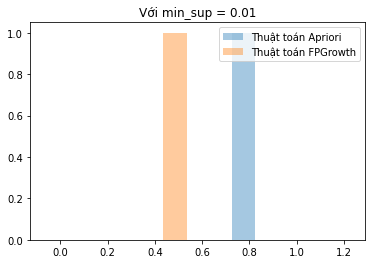

In [208]:
ax = sns.distplot(Time_Ap[0], bins=10, label = 'Thuật toán Apriori', kde = False)
ax = sns.distplot(Time_FP[0], bins=10, label = 'Thuật toán FPGrowth', kde = False)
ax.legend()
ax.set_title('Với min_sup = 0.01')

<p>- So sánh hai thuật toán khi min_sup = 0.02

Text(0.5, 1.0, 'Với min_sup = 0.02')

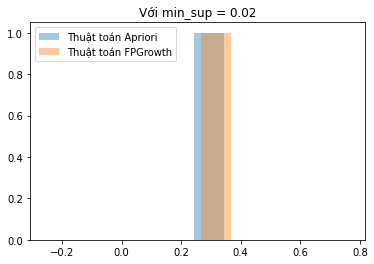

In [209]:
ax = sns.distplot(Time_Ap[1], bins=10, label = 'Thuật toán Apriori', kde = False)
ax = sns.distplot(Time_FP[1], bins=10, label = 'Thuật toán FPGrowth', kde = False)
ax.legend()
ax.set_title('Với min_sup = 0.02')

<p>- So sánh hai thuật toán khi min_sup = 0.03

Text(0.5, 1.0, 'Với min_sup = 0.03')

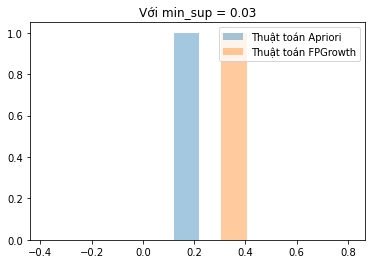

In [210]:
ax = sns.distplot(Time_Ap[2], bins=10, label = 'Thuật toán Apriori', kde = False)
ax = sns.distplot(Time_FP[2], bins=10, label = 'Thuật toán FPGrowth', kde = False)
ax.legend()
ax.set_title('Với min_sup = 0.03')

<p>- So sánh hai thuật toán khi min_sup = 0.04

Text(0.5, 1.0, 'Với min_sup = 0.04')

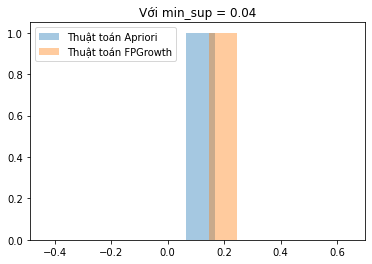

In [211]:
ax = sns.distplot(Time_Ap[3], bins=10, label = 'Thuật toán Apriori', kde = False)
ax = sns.distplot(Time_FP[3], bins=10, label = 'Thuật toán FPGrowth', kde = False)
ax.legend()
ax.set_title('Với min_sup = 0.04')

<p>- So sánh hai thuật toán khi min_sup = 0.05

Text(0.5, 1.0, 'Với min_sup = 0.05')

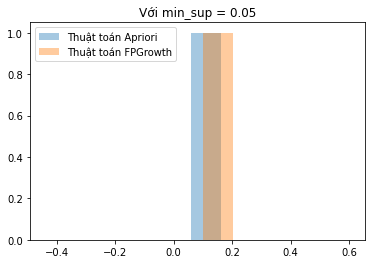

In [212]:
ax = sns.distplot(Time_Ap[4], bins=10, label = 'Thuật toán Apriori', kde = False)
ax = sns.distplot(Time_FP[4], bins=10, label = 'Thuật toán FPGrowth', kde = False)
ax.legend()
ax.set_title('Với min_sup = 0.05')

<p>- So sánh hai thuật toán khi min_sup = 0.06

<p>- So sánh hai thuật toán khi min_sup = 0.06

Text(0.5, 1.0, 'Với min_sup = 0.06')

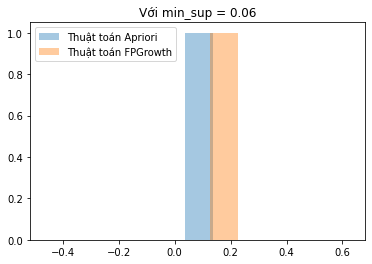

In [213]:
ax = sns.distplot(Time_Ap[5], bins=10, label = 'Thuật toán Apriori', kde = False)
ax = sns.distplot(Time_FP[5], bins=10, label = 'Thuật toán FPGrowth', kde = False)
ax.legend()
ax.set_title('Với min_sup = 0.06')

<p>- So sánh hai thuật toán khi min_sup = 0.07

Text(0.5, 1.0, 'Với min_sup = 0.07')

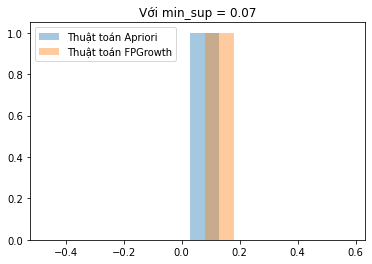

In [214]:
ax = sns.distplot(Time_Ap[6], bins=10, label = 'Thuật toán Apriori', kde = False)
ax = sns.distplot(Time_FP[6], bins=10, label = 'Thuật toán FPGrowth', kde = False)
ax.legend()
ax.set_title('Với min_sup = 0.07')

<p>- So sánh hai thuật toán khi min_sup = 0.08

Text(0.5, 1.0, 'Với min_sup = 0.08')

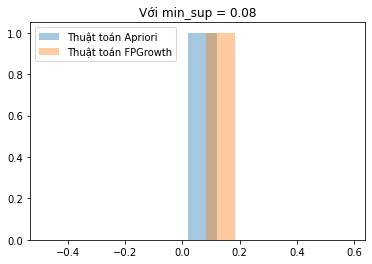

In [215]:
ax = sns.distplot(Time_Ap[7], bins=10, label = 'Thuật toán Apriori', kde = False)
ax = sns.distplot(Time_FP[7], bins=10, label = 'Thuật toán FPGrowth', kde = False)
ax.legend()
ax.set_title('Với min_sup = 0.08')

<p>- So sánh hai thuật toán khi min_sup = 0.09

Text(0.5, 1.0, 'Với min_sup = 0.09')

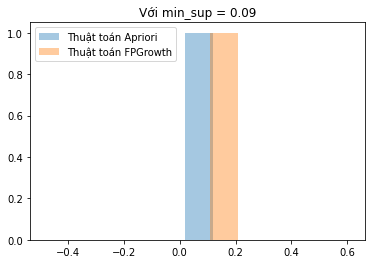

In [216]:
ax = sns.distplot(Time_Ap[8], bins=10, label = 'Thuật toán Apriori', kde = False)
ax = sns.distplot(Time_FP[8], bins=10, label = 'Thuật toán FPGrowth', kde = False)
ax.legend()
ax.set_title('Với min_sup = 0.09')

<p>- So sánh hai thuật toán khi min_sup = 0.1

Text(0.5, 1.0, 'Với min_sup = 0.1')

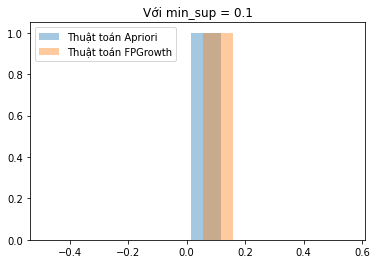

In [217]:
ax = sns.distplot(Time_Ap[9], bins=10, label = 'Thuật toán Apriori', kde = False)
ax = sns.distplot(Time_FP[9], bins=10, label = 'Thuật toán FPGrowth', kde = False)
ax.legend()
ax.set_title('Với min_sup = 0.1')

<li>Nhận xét:

<p>- Ban đầu, khi min_sup = 0.01 thì thuật toán FP-Growth tốn ít thời gian hơn so với thuật toán Aprior
<p>- min_sup càng lớn thì thuật toán Apriori chạy nhanh hơn thuật toán FPGrowth
<p>- min_sup nhỏ thì thuật toán FPGrowth chạy nhanh hơn

<li>Giải thích

<p>- Vì khi min_sup càng lớn thì thì sẽ giúp ta loại bớt những giá trị không thỏa yêu cầu nhanh hơn và tìm được tập phổ biến cuối cùng nhanh hơn.